In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import koreanize_matplotlib

In [9]:
base_path = "csv_data"
train = pd.read_csv(f"{base_path}/train.csv")
train.head()

,ID,img_path,mask_path,나이,수술연월일,진단명,암의 위치,암의 개수,암의 장경,NG,...,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,N_category
0,BC_01_0001,./train_imgs/BC_01_0001.png,-,63,2015-10-23,1,2,1,19.0,2.0,...,8.0,1.0,6.0,12.0,0.0,1.0,NaN,NaN,NaN,0
1,BC_01_0002,./train_imgs/BC_01_0002.png,-,51,2015-10-28,1,1,1,22.0,3.0,...,NaN,0.0,NaN,70.0,0.0,0.0,NaN,NaN,NaN,1
2,BC_01_0003,./train_imgs/BC_01_0003.png,-,37,2015-10-29,1,2,1,NaN,2.0,...,7.0,1.0,4.0,7.0,0.0,1.0,NaN,NaN,0.0,0
3,BC_01_0004,./train_imgs/BC_01_0004.png,-,54,2016-03-08,1,2,1,0.0,3.0,...,NaN,0.0,NaN,1.0,1.0,3.0,NaN,NaN,NaN,0
4,BC_01_0005,./train_imgs/BC_01_0005.png,-,57,2015-10-30,1,2,1,8.0,2.0,...,8.0,0.0,NaN,8.0,1.0,2.0,1.0,5.44,NaN,0


In [10]:
base_path = "csv_data"
test = pd.read_csv(f"{base_path}/test.csv")
test.head()

,ID,img_path,나이,수술연월일,진단명,암의 위치,암의 개수,암의 장경,NG,HG,...,ER,ER_Allred_score,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation
0,BC_01_0011,./test_imgs/BC_01_0011.png,55,2015-11-17,2,2,1,23.0,2.0,2.0,...,1.0,8.0,0.0,2.0,5.00,0.0,1.0,NaN,NaN,NaN
1,BC_01_0220,./test_imgs/BC_01_0220.png,43,2020-06-09,4,2,1,13.0,3.0,2.0,...,1.0,4.0,1.0,8.0,8.67,0.0,0.0,NaN,NaN,NaN
2,BC_01_0233,./test_imgs/BC_01_0233.png,76,2020-05-14,1,1,1,NaN,NaN,NaN,...,1.0,6.0,1.0,6.0,NaN,NaN,2.0,NaN,NaN,NaN
3,BC_01_0258,./test_imgs/BC_01_0258.png,58,2020-05-20,1,2,1,1.3,2.0,2.0,...,1.0,7.0,0.0,NaN,21.17,1.0,3.0,NaN,NaN,0.0
4,BC_01_0260,./test_imgs/BC_01_0260.png,56,2020-05-20,1,2,2,15.0,3.0,3.0,...,1.0,8.0,1.0,3.0,20.57,1.0,3.0,NaN,NaN,NaN


## 데이터 탐색

In [11]:
print(train.shape, test.shape)

(1000, 28) (250, 26)


In [12]:
set(train.columns)-set(test.columns)

{'N_category', 'mask_path'}

/var/folders/k5/knpgq_1j4xg_p46vnk55j0gm0000gn/T/ipykernel_2425/1238522083.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot = True, cmap="Blues");


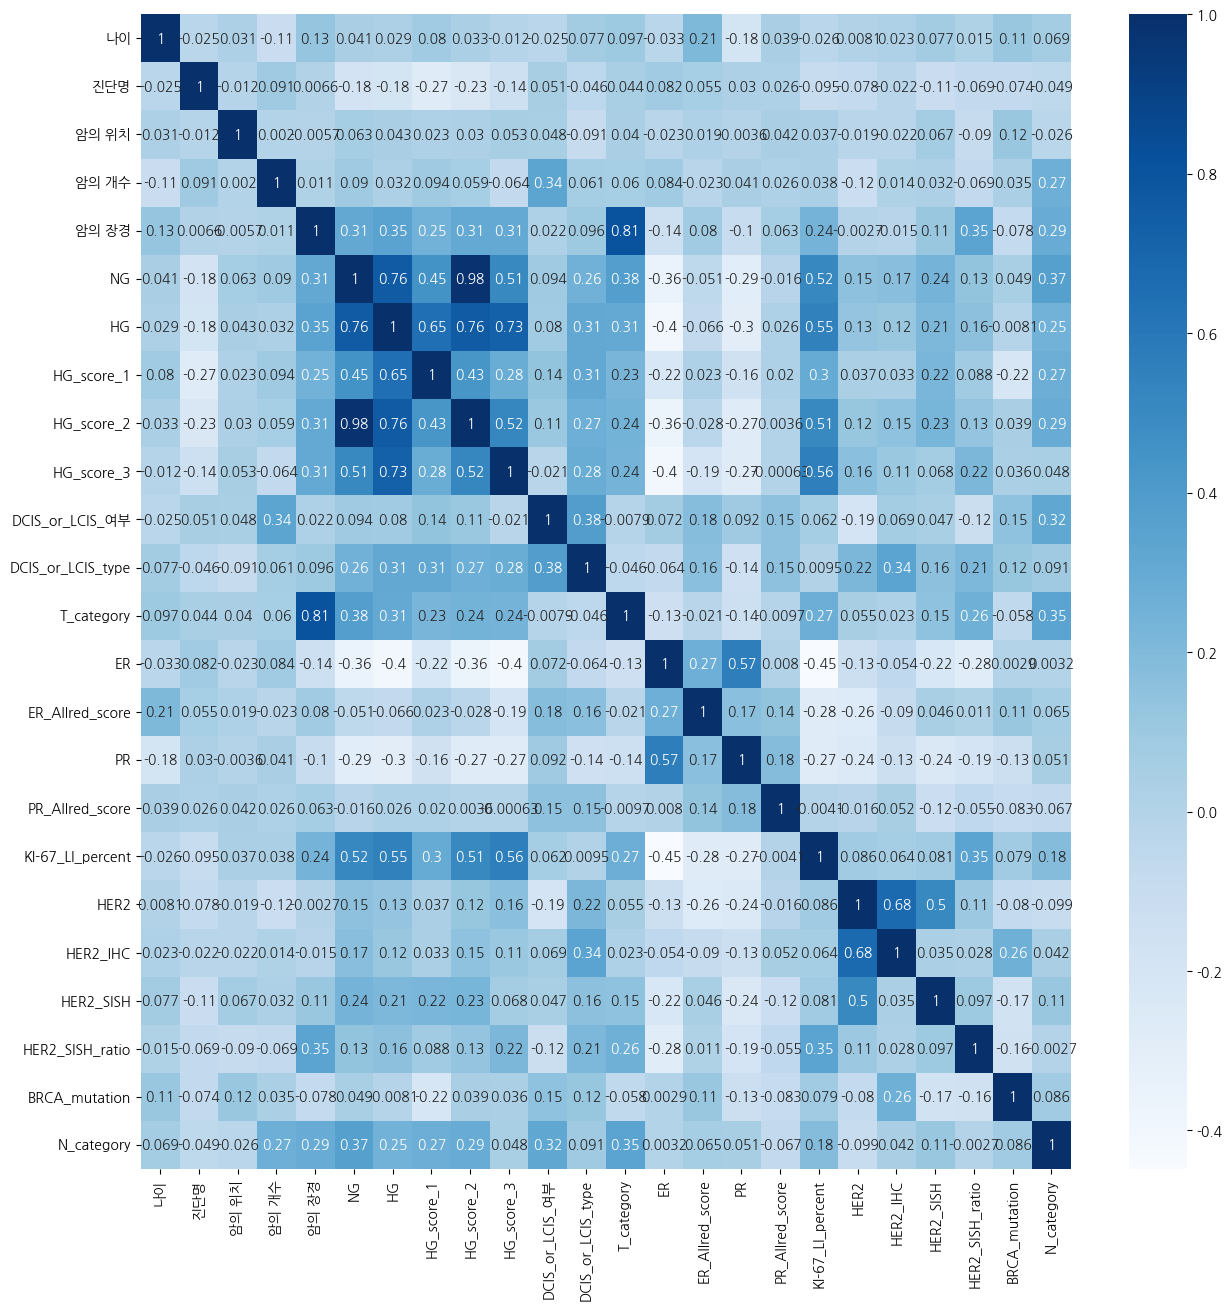

In [13]:
# 상관계수
plt.figure(figsize = (15,15))
sns.heatmap(train.corr(), annot = True, cmap="Blues");

## 데이터 전처리

In [14]:
# 진단명 칼럼 변수형데이터로 변경
진단명 = ["유관 상피내암", "소엽 상피내암", "점액성 암", "기타"]
train["진단명"] = train["진단명"].map(lambda x : 진단명[int(x-1)])
test["진단명"] = test["진단명"].map(lambda x : 진단명[int(x-1)])

In [15]:
# 암의 위치 칼럼 변수형데이터로 변경
암의위치 = ["Right", "Left", "Both"]
train["암의 위치"] = train["암의 위치"].map(lambda x : 암의위치[int(x-1)])
test["암의 위치"] = test["암의 위치"].map(lambda x : 암의위치[int(x-1)])

In [16]:
#암의 개수 칼럼 변수형데이터로 변경
암의개수 = ["single", "multiple"]
train["암의 개수"] = train["암의 개수"].map(lambda x : 암의개수[int(x-1)])
test["암의 개수"] = test["암의 개수"].map(lambda x : 암의개수[int(x-1)])

In [17]:
# 암의 장경 결측치 처리 (평균값 대입)
train["암의 장경_fill"] = train["암의 장경"].fillna(train["암의 장경"].mean())

In [18]:
test["암의 장경_fill"] = test["암의 장경"].fillna(test["암의 장경"].mean())

<AxesSubplot: >

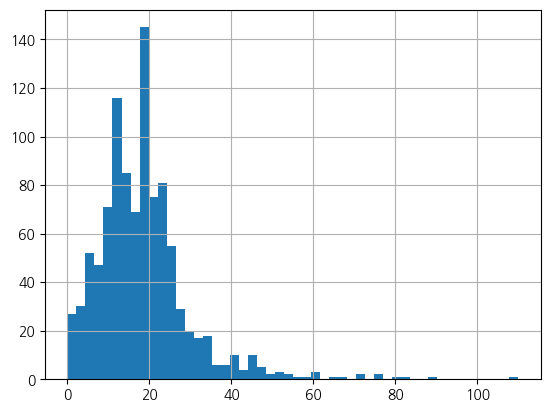

In [19]:
train["암의 장경_fill"].hist(bins = 50)

In [20]:
# 암의 장경 스케일링(standard scailing)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train["암의 장경_fill_ss"] = ss.fit(train[["암의 장경_fill"]]).transform(train[["암의 장경_fill"]])
train.head()

,ID,img_path,mask_path,나이,수술연월일,진단명,암의 위치,암의 개수,암의 장경,NG,...,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,N_category,암의 장경_fill,암의 장경_fill_ss
0,BC_01_0001,./train_imgs/BC_01_0001.png,-,63,2015-10-23,유관 상피내암,Left,single,19.0,2.0,...,6.0,12.0,0.0,1.0,NaN,NaN,NaN,0,19.000000,5.379267e-02
1,BC_01_0002,./train_imgs/BC_01_0002.png,-,51,2015-10-28,유관 상피내암,Right,single,22.0,3.0,...,NaN,70.0,0.0,0.0,NaN,NaN,NaN,1,22.000000,3.122306e-01
2,BC_01_0003,./train_imgs/BC_01_0003.png,-,37,2015-10-29,유관 상피내암,Left,single,NaN,2.0,...,4.0,7.0,0.0,1.0,NaN,NaN,0.0,0,18.375564,3.060520e-16
3,BC_01_0004,./train_imgs/BC_01_0004.png,-,54,2016-03-08,유관 상피내암,Left,single,0.0,3.0,...,NaN,1.0,1.0,3.0,NaN,NaN,NaN,0,0.000000,-1.582981e+00
4,BC_01_0005,./train_imgs/BC_01_0005.png,-,57,2015-10-30,유관 상피내암,Left,single,8.0,2.0,...,NaN,8.0,1.0,2.0,1.0,5.44,NaN,0,8.000000,-8.938132e-01


In [21]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
test["암의 장경_fill_ss"] = ss.fit(test[["암의 장경_fill"]]).transform(test[["암의 장경_fill"]])
test.head()

,ID,img_path,나이,수술연월일,진단명,암의 위치,암의 개수,암의 장경,NG,HG,...,PR,PR_Allred_score,KI-67_LI_percent,HER2,HER2_IHC,HER2_SISH,HER2_SISH_ratio,BRCA_mutation,암의 장경_fill,암의 장경_fill_ss
0,BC_01_0011,./test_imgs/BC_01_0011.png,55,2015-11-17,소엽 상피내암,Left,single,23.0,2.0,2.0,...,0.0,2.0,5.00,0.0,1.0,NaN,NaN,NaN,23.000000,3.659636e-01
1,BC_01_0220,./test_imgs/BC_01_0220.png,43,2020-06-09,기타,Left,single,13.0,3.0,2.0,...,1.0,8.0,8.67,0.0,0.0,NaN,NaN,NaN,13.000000,-5.039800e-01
2,BC_01_0233,./test_imgs/BC_01_0233.png,76,2020-05-14,유관 상피내암,Right,single,NaN,NaN,NaN,...,1.0,6.0,NaN,NaN,2.0,NaN,NaN,NaN,18.793249,-3.090660e-16
3,BC_01_0258,./test_imgs/BC_01_0258.png,58,2020-05-20,유관 상피내암,Left,single,1.3,2.0,2.0,...,0.0,NaN,21.17,1.0,3.0,NaN,NaN,0.0,1.300000,-1.521814e+00
4,BC_01_0260,./test_imgs/BC_01_0260.png,56,2020-05-20,유관 상피내암,Left,multiple,15.0,3.0,3.0,...,1.0,3.0,20.57,1.0,3.0,NaN,NaN,NaN,15.000000,-3.299912e-01


<AxesSubplot: >

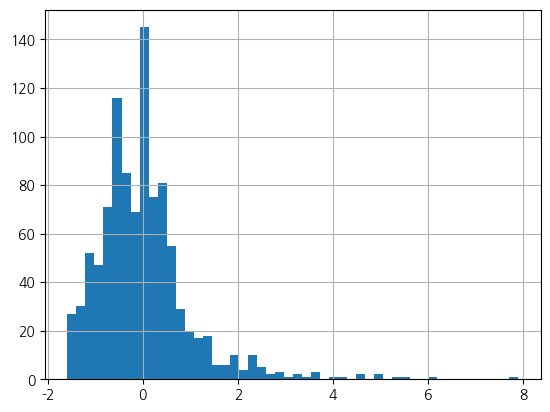

In [22]:
train["암의 장경_fill_ss"].hist(bins = 50)

<AxesSubplot: >

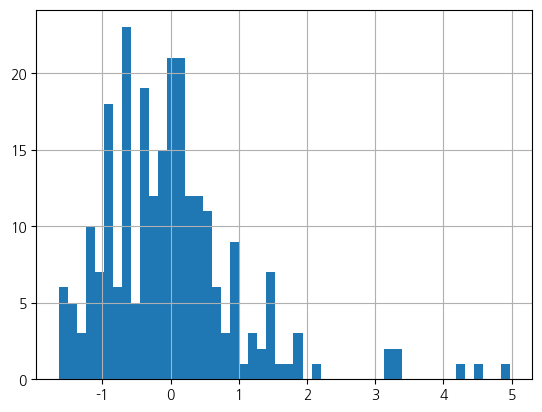

In [23]:
test["암의 장경_fill_ss"].hist(bins = 50)

/Users/moksu/miniforge3/envs/lion/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: >

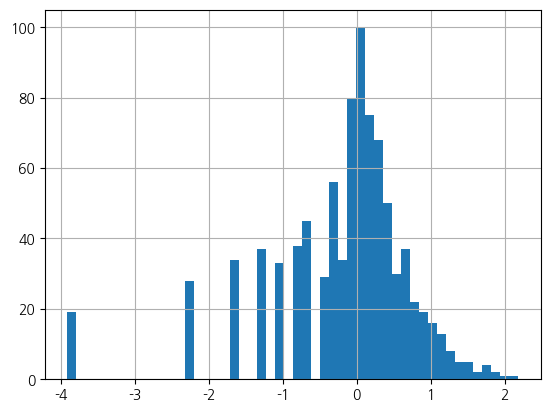

In [24]:
train["암의 장경_fill_ss_log"] = np.log1p(train["암의 장경_fill_ss"])
train["암의 장경_fill_ss_log"].hist(bins = 50)

/Users/moksu/miniforge3/envs/lion/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: >

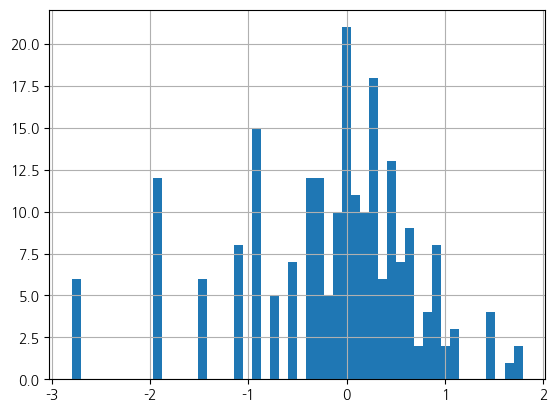

In [25]:
test["암의 장경_fill_ss_log"] = np.log1p(test["암의 장경_fill_ss"])
test["암의 장경_fill_ss_log"].hist(bins = 50)

In [26]:
#암의 장경 결측치 평균값으로 대치
train["암의 장경_fill_ss_log"] = train["암의 장경_fill_ss_log"].fillna(train["암의 장경_fill_ss_log"].mean())
test["암의 장경_fill_ss_log"] = test["암의 장경_fill_ss_log"].fillna(test["암의 장경_fill_ss_log"].mean())

In [27]:
# NG 칼럼 변수형데이터로 변경
def NG (x):
    if x == 1:
        return "NG1"
    elif x == 2:
        return "NG2"
    elif x == 3:
        return "NG3"

In [28]:
train["NG"] = train["NG"].map(lambda x : NG(x))

In [29]:
test["NG"] = test["NG"].map(lambda x : NG(x))

In [30]:
# HG 칼럼 변수형데이터로 변경
train["HG"] = train["HG"].fillna(4.)
test["HG"] = test["HG"].fillna(4.)


In [31]:
HG_list = ["HG1", "HG2", "HG3", "not graded"]
train ["HG"] = train["HG"].map(lambda x : HG_list[int(x)-1])
test ["HG"] = test["HG"].map(lambda x : HG_list[int(x)-1])

In [32]:
# HG_score_1 칼럼 변수형데이터로 변경
train["HG_score_1"] = train["HG_score_1"].fillna(4.)
test["HG_score_1"] = test["HG_score_1"].fillna(4.)
HG_score1_list = ["score1", "score2", "score3", "not graded"]
train ["HG_score_1"] = train["HG_score_1"].map(lambda x : HG_score1_list[int(x)-1])
test ["HG_score_1"] = test["HG_score_1"].map(lambda x : HG_score1_list[int(x)-1])

In [33]:
# HG_score_2 칼럼 변수형데이터로 변경
train["HG_score_2"] = train["HG_score_2"].fillna(4.)
test["HG_score_2"] = test["HG_score_2"].fillna(4.)
HG_score2_list = ["score1", "score2", "score3", "not graded"]
train ["HG_score_2"] = train["HG_score_2"].map(lambda x : HG_score2_list[int(x)-1])
test ["HG_score_2"] = test["HG_score_2"].map(lambda x : HG_score2_list[int(x)-1])

In [34]:
# HG_score_3 칼럼 변수형데이터로 변경
train["HG_score_3"] = train["HG_score_3"].fillna(4.)
test["HG_score_3"] = test["HG_score_3"].fillna(4.)
HG_score3_list = ["score1", "score2", "score3", "not graded"]
train ["HG_score_3"] = train["HG_score_3"].map(lambda x : HG_score3_list[int(x)-1])
test ["HG_score_3"] = test["HG_score_3"].map(lambda x : HG_score3_list[int(x)-1])

In [35]:
train["DCIS_or_LCIS_여부"].unique()

array([2, 0, 1])

In [36]:
# DCIS_or_LCIS_여부 칼럼 변수형데이터로 변경
DCIS_or_LCIS = ["no DCIS/LCIS", "EIC-", "EIC+"]
train ["DCIS_or_LCIS_여부"] = train["DCIS_or_LCIS_여부"].map(lambda x : DCIS_or_LCIS[int(x)-1])
test ["DCIS_or_LCIS_여부"] = test["DCIS_or_LCIS_여부"].map(lambda x : DCIS_or_LCIS[int(x)-1])

In [37]:
# 결측치가 많아 칼럼 삭제
train = train.drop(columns="DCIS_or_LCIS_type")
test = test.drop (columns = "DCIS_or_LCIS_type")

In [38]:
# T_category 칼럼 결측치 0을 대치
train["T_category"] = train["T_category"].fillna(0)
test["T_category"] = test["T_category"].fillna(0)

In [39]:
# T_category 칼럼 변수형데이터로 변경
T_category = ["Tis", "T1", "T2", "T3", "T4"]
train ["T_category"] = train["T_category"].map(lambda x : T_category[int(x)])
test ["T_category"] = test["T_category"].map(lambda x : T_category[int(x)])

In [40]:
# ER 칼럼 결측치 0으로 대치
train["ER"] = train["ER"].fillna(0)
test["ER"] = test["ER"].fillna(0)

In [41]:
# ER 칼럼 변수형데이터로 변경
ER = ["-", "+"]
train ["ER"] = train["ER"].map(lambda x : ER[int(x)])
test ["ER"] = test["ER"].map(lambda x : ER[int(x)])

In [42]:
# ER_Allred_score칼럼 결측치 평균값 대치
train["ER_Allred_score"] = train["ER_Allred_score"].fillna(train["ER_Allred_score"].mean())
test["ER_Allred_score"] = test["ER_Allred_score"].fillna(test["ER_Allred_score"].mean())

In [43]:
# PR 칼럼 결측치 0으로 대치
train["PR"] = train["PR"].fillna(0)
test["PR"] = test["PR"].fillna(0)

In [44]:
# PR 칼럼 변수형데이터로 변경
PR = ["-", "+"]
train ["PR"] = train["PR"].map(lambda x : PR[int(x)])
test ["PR"] = test["PR"].map(lambda x : PR[int(x)])

In [45]:
# PR_Allred_score칼럼 결측치 평균값 대치
train["PR_Allred_score"] = train["PR_Allred_score"].fillna(train["PR_Allred_score"].mean())
test["PR_Allred_score"] = test["PR_Allred_score"].fillna(test["PR_Allred_score"].mean())

<AxesSubplot: >

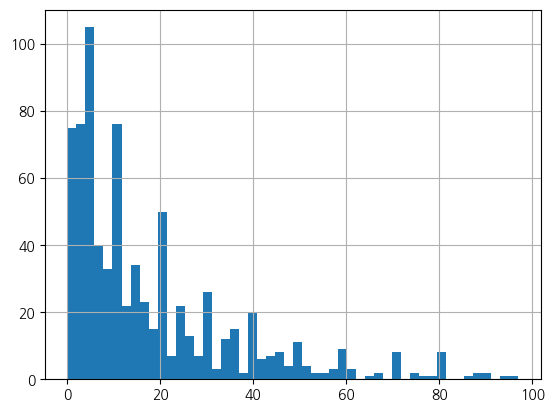

In [46]:
# KI-67_LI_percent 칼럼 전처리
train["KI-67_LI_percent"].hist(bins = 50)

In [47]:
# KI-67_LI_percent 칼럼 결측치 평균갑으로 대치
train["KI-67_LI_percent"] = train["KI-67_LI_percent"].fillna(int(train["KI-67_LI_percent"].mean()))
test["KI-67_LI_percent"] = test["KI-67_LI_percent"].fillna(int(test["KI-67_LI_percent"].mean()))

In [48]:
# KI-67_LI_percent 칼럼 스케일링
train["KI-67_LI_percent_ss"] = ss.fit(train[["KI-67_LI_percent"]]).transform(train[["KI-67_LI_percent"]])

In [49]:
test["KI-67_LI_percent_ss"] = ss.fit(test[["KI-67_LI_percent"]]).transform(test[["KI-67_LI_percent"]])

/Users/moksu/miniforge3/envs/lion/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: >

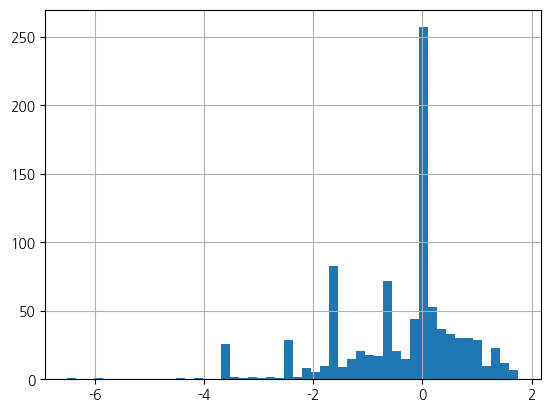

In [50]:
train["KI-67_LI_percent_logss"] = np.log1p(train["KI-67_LI_percent_ss"])
train["KI-67_LI_percent_logss"].hist(bins = 50)

/Users/moksu/miniforge3/envs/lion/lib/python3.9/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot: >

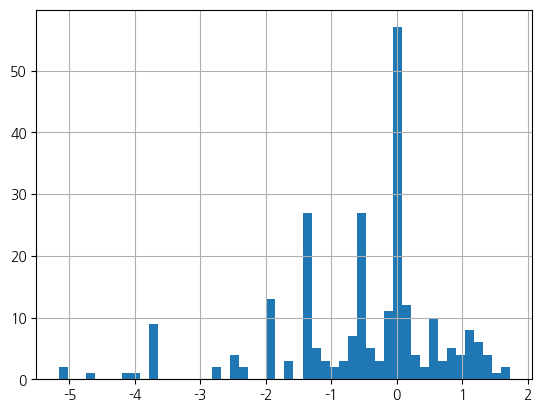

In [51]:
test["KI-67_LI_percent_logss"] = np.log1p(test["KI-67_LI_percent_ss"])
test["KI-67_LI_percent_logss"].hist(bins = 50)

In [52]:
# KI-67_LI_percent 칼럼 결측치 평균값 대치
train["KI-67_LI_percent_logss"]= train["KI-67_LI_percent_logss"].fillna(0)
test["KI-67_LI_percent_logss"]= test["KI-67_LI_percent_logss"].fillna(0)

In [53]:
# HER2 칼럼 결측치 0으로 대치
train["HER2"] = train["HER2"].fillna(0)
test["HER2"] = test["HER2"].fillna(0)

In [54]:
# HER2 칼럼 변수형데이터로 변경
HER2 = ["-", "+"]
train ["HER2"] = train["HER2"].map(lambda x : HER2[int(x)])
test ["HER2"] = test["HER2"].map(lambda x : HER2[int(x)])

In [55]:
# HER2_IHC 칼럼 결측치 0으로 대치
train["HER2_IHC"] = train["HER2_IHC"].fillna(0)
test["HER2_IHC"] = test["HER2_IHC"].fillna(0)

In [56]:
# HER2_IHC 칼럼 변수형데이터로 변경
def HER2_IHC (x):
    if x == 0 or x == 1:
        return "Negative"
    elif x == 2:
        return "Equivocal"
    elif x == 3:
        return "Positive"
train ["HER2_IHC"] = train["HER2_IHC"].map(lambda x : HER2_IHC(int(x)))
test ["HER2_IHC"] = test["HER2_IHC"].map(lambda x : HER2_IHC(int(x)))

In [57]:
# HER2_SISH 칼럼 결측치 0으로 대치
train["HER2_SISH"] = train["HER2_SISH"].fillna(0)
test["HER2_SISH"] = test["HER2_SISH"].fillna(0)

In [58]:
# HER2_SISH 칼럼 변수형데이터로 변경
HER2_SISH = ["negative", "positive"]
train ["HER2_SISH"] = train["HER2_SISH"].map(lambda x : HER2_SISH[int(x)])
test ["HER2_SISH"] = test["HER2_SISH"].map(lambda x : HER2_SISH[int(x)])

In [59]:
# HER2_SISH_ratio 칼럼 결측치가 많아 삭제
train = train.drop(columns="HER2_SISH_ratio")
test = test.drop(columns="HER2_SISH_ratio")

In [60]:
# BRCA_mutation 칼럼 결측치가 많아 삭제
train = train.drop(columns="BRCA_mutation")
test = test.drop(columns="BRCA_mutation")

In [61]:
train.columns

Index(['ID', 'img_path', 'mask_path', '나이', '수술연월일', '진단명', '암의 위치', '암의 개수',
       '암의 장경', 'NG', 'HG', 'HG_score_1', 'HG_score_2', 'HG_score_3',
       'DCIS_or_LCIS_여부', 'T_category', 'ER', 'ER_Allred_score', 'PR',
       'PR_Allred_score', 'KI-67_LI_percent', 'HER2', 'HER2_IHC', 'HER2_SISH',
       'N_category', '암의 장경_fill', '암의 장경_fill_ss', '암의 장경_fill_ss_log',
       'KI-67_LI_percent_ss', 'KI-67_LI_percent_logss'],
      dtype='object')

In [62]:
test.columns

Index(['ID', 'img_path', '나이', '수술연월일', '진단명', '암의 위치', '암의 개수', '암의 장경', 'NG',
       'HG', 'HG_score_1', 'HG_score_2', 'HG_score_3', 'DCIS_or_LCIS_여부',
       'T_category', 'ER', 'ER_Allred_score', 'PR', 'PR_Allred_score',
       'KI-67_LI_percent', 'HER2', 'HER2_IHC', 'HER2_SISH', '암의 장경_fill',
       '암의 장경_fill_ss', '암의 장경_fill_ss_log', 'KI-67_LI_percent_ss',
       'KI-67_LI_percent_logss'],
      dtype='object')

## 인코딩

In [63]:
train2 = train.copy()
test2 = test.copy()

In [64]:
train2.columns

Index(['ID', 'img_path', 'mask_path', '나이', '수술연월일', '진단명', '암의 위치', '암의 개수',
       '암의 장경', 'NG', 'HG', 'HG_score_1', 'HG_score_2', 'HG_score_3',
       'DCIS_or_LCIS_여부', 'T_category', 'ER', 'ER_Allred_score', 'PR',
       'PR_Allred_score', 'KI-67_LI_percent', 'HER2', 'HER2_IHC', 'HER2_SISH',
       'N_category', '암의 장경_fill', '암의 장경_fill_ss', '암의 장경_fill_ss_log',
       'KI-67_LI_percent_ss', 'KI-67_LI_percent_logss'],
      dtype='object')

In [65]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1000 non-null   object 
 1   img_path                1000 non-null   object 
 2   mask_path               1000 non-null   object 
 3   나이                      1000 non-null   int64  
 4   수술연월일                   1000 non-null   object 
 5   진단명                     1000 non-null   object 
 6   암의 위치                   1000 non-null   object 
 7   암의 개수                   1000 non-null   object 
 8   암의 장경                   931 non-null    float64
 9   NG                      949 non-null    object 
 10  HG                      1000 non-null   object 
 11  HG_score_1              1000 non-null   object 
 12  HG_score_2              1000 non-null   object 
 13  HG_score_3              1000 non-null   object 
 14  DCIS_or_LCIS_여부         1000 non-null   o

In [66]:
train2 = train2[['나이', '진단명', '암의 위치', '암의 개수', 'NG', 'HG', 'HG_score_1', 'HG_score_2', 'HG_score_3',
       'DCIS_or_LCIS_여부', 'T_category', 'ER', 'ER_Allred_score', 'PR',
       'PR_Allred_score', 'HER2', 'HER2_IHC', 'HER2_SISH',
       'N_category', '암의 장경_fill_ss_log', 'KI-67_LI_percent_logss']]

In [67]:
test2 = test2[['나이', '진단명', '암의 위치', '암의 개수', 'NG', 'HG', 'HG_score_1', 'HG_score_2', 'HG_score_3',
       'DCIS_or_LCIS_여부', 'T_category', 'ER', 'ER_Allred_score', 'PR',
       'PR_Allred_score', 'HER2', 'HER2_IHC', 'HER2_SISH', '암의 장경_fill_ss_log', 'KI-67_LI_percent_logss']]

In [68]:
#원핫 인코딩
train3 = pd.get_dummies(train2)

In [69]:
test3 = pd.get_dummies(test2)

## 학습, 정답 데이터 셋

In [70]:
label_name = "N_category"
label_name

'N_category'

In [71]:
train3.columns

Index(['나이', 'ER_Allred_score', 'PR_Allred_score', 'N_category',
       '암의 장경_fill_ss_log', 'KI-67_LI_percent_logss', '진단명_기타', '진단명_소엽 상피내암',
       '진단명_유관 상피내암', '진단명_점액성 암', '암의 위치_Both', '암의 위치_Left', '암의 위치_Right',
       '암의 개수_multiple', '암의 개수_single', 'NG_NG1', 'NG_NG2', 'NG_NG3',
       'HG_HG1', 'HG_HG2', 'HG_HG3', 'HG_not graded', 'HG_score_1_not graded',
       'HG_score_1_score1', 'HG_score_1_score2', 'HG_score_1_score3',
       'HG_score_2_not graded', 'HG_score_2_score1', 'HG_score_2_score2',
       'HG_score_2_score3', 'HG_score_3_not graded', 'HG_score_3_score1',
       'HG_score_3_score2', 'HG_score_3_score3', 'DCIS_or_LCIS_여부_EIC+',
       'DCIS_or_LCIS_여부_EIC-', 'DCIS_or_LCIS_여부_no DCIS/LCIS', 'T_category_T1',
       'T_category_T2', 'T_category_T3', 'T_category_T4', 'T_category_Tis',
       'ER_+', 'ER_-', 'PR_+', 'PR_-', 'HER2_+', 'HER2_-',
       'HER2_IHC_Equivocal', 'HER2_IHC_Negative', 'HER2_IHC_Positive',
       'HER2_SISH_negative', 'HER2_SISH_positive'],

In [72]:
feature_names = ['나이', 'ER_Allred_score', 'PR_Allred_score',
       '암의 장경_fill_ss_log',
       'KI-67_LI_percent_logss', '진단명_기타', '진단명_소엽 상피내암', '진단명_유관 상피내암',
       '진단명_점액성 암', '암의 위치_Both', '암의 위치_Left', '암의 위치_Right',
       '암의 개수_multiple', '암의 개수_single', 'NG_NG1', 'NG_NG2', 'NG_NG3',
       'HG_HG1', 'HG_HG2', 'HG_HG3', 'HG_not graded', 'HG_score_1_not graded',
       'HG_score_1_score1', 'HG_score_1_score2', 'HG_score_1_score3',
       'HG_score_2_not graded', 'HG_score_2_score1', 'HG_score_2_score2',
       'HG_score_2_score3', 'HG_score_3_not graded', 'HG_score_3_score1',
       'HG_score_3_score2', 'HG_score_3_score3', 'DCIS_or_LCIS_여부_EIC+',
       'DCIS_or_LCIS_여부_EIC-', 'DCIS_or_LCIS_여부_no DCIS/LCIS', 'T_category_T1',
       'T_category_T2', 'T_category_T3', 'T_category_T4', 'T_category_Tis',
       'ER_+', 'ER_-', 'PR_+', 'PR_-', 'HER2_+', 'HER2_-',
       'HER2_IHC_Equivocal', 'HER2_IHC_Negative', 'HER2_IHC_Positive',
       'HER2_SISH_negative', 'HER2_SISH_positive']
feature_names

['나이',
 'ER_Allred_score',
 'PR_Allred_score',
 '암의 장경_fill_ss_log',
 'KI-67_LI_percent_logss',
 '진단명_기타',
 '진단명_소엽 상피내암',
 '진단명_유관 상피내암',
 '진단명_점액성 암',
 '암의 위치_Both',
 '암의 위치_Left',
 '암의 위치_Right',
 '암의 개수_multiple',
 '암의 개수_single',
 'NG_NG1',
 'NG_NG2',
 'NG_NG3',
 'HG_HG1',
 'HG_HG2',
 'HG_HG3',
 'HG_not graded',
 'HG_score_1_not graded',
 'HG_score_1_score1',
 'HG_score_1_score2',
 'HG_score_1_score3',
 'HG_score_2_not graded',
 'HG_score_2_score1',
 'HG_score_2_score2',
 'HG_score_2_score3',
 'HG_score_3_not graded',
 'HG_score_3_score1',
 'HG_score_3_score2',
 'HG_score_3_score3',
 'DCIS_or_LCIS_여부_EIC+',
 'DCIS_or_LCIS_여부_EIC-',
 'DCIS_or_LCIS_여부_no DCIS/LCIS',
 'T_category_T1',
 'T_category_T2',
 'T_category_T3',
 'T_category_T4',
 'T_category_Tis',
 'ER_+',
 'ER_-',
 'PR_+',
 'PR_-',
 'HER2_+',
 'HER2_-',
 'HER2_IHC_Equivocal',
 'HER2_IHC_Negative',
 'HER2_IHC_Positive',
 'HER2_SISH_negative',
 'HER2_SISH_positive']

In [73]:
X_train = train3[feature_names]
X_train.shape

(1000, 52)

In [74]:
y_train = train3[label_name]
y_train.shape

(1000,)

In [75]:
X_test = test3[feature_names]
X_test.shape

(250, 52)

## 머신러닝 알고리즘

In [76]:
# 랜덤포레스트 분류 모델
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_jobs= -1)

In [77]:
max_depth = (range(170, 185))
max_features = [0.115, 0.116, 0.117, 0.118, 0.119, 0.12, 0.121,0.122,0.123,0.124,0.125]
parameters = {"max_depth":max_depth, "max_features": max_features}
from matplotlib.streamplot import Grid
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model, parameters, n_jobs = -1, cv = 5)
clf.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(170, 185),
                         'max_features': [0.115, 0.116, 0.117, 0.118, 0.119,
                                          0.12, 0.121, 0.122, 0.123, 0.124,
                                          0.125]})

In [78]:
'''
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {"max_depth": np.random.randint(180, 200, 10), 
                       "max_features": np.random.uniform(0.1, 0.5, 50)}
reg = RandomizedSearchCV(model, param_distributions=param_distributions, scoring = "neg_root_mean_squared_error", n_iter=50, cv = 5, n_jobs= -1, verbose=2, random_state=42)
reg.fit(X_train, y_train)
'''

'\nfrom sklearn.model_selection import RandomizedSearchCV\nparam_distributions = {"max_depth": np.random.randint(180, 200, 10), \n                       "max_features": np.random.uniform(0.1, 0.5, 50)}\nreg = RandomizedSearchCV(model, param_distributions=param_distributions, scoring = "neg_root_mean_squared_error", n_iter=50, cv = 5, n_jobs= -1, verbose=2, random_state=42)\nreg.fit(X_train, y_train)\n'

In [79]:
best_model = clf.best_estimator_
best_model

RandomForestClassifier(max_depth=170, max_features=0.116, n_jobs=-1,
                       random_state=42)

In [80]:
best_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=170, max_features=0.116, n_jobs=-1,
                       random_state=42)

## 피쳐 중요도 확인

In [81]:
fi = pd.Series(best_model.feature_importances_)
fi.index = best_model.feature_names_in_
fi = fi.sort_values()

<AxesSubplot: >

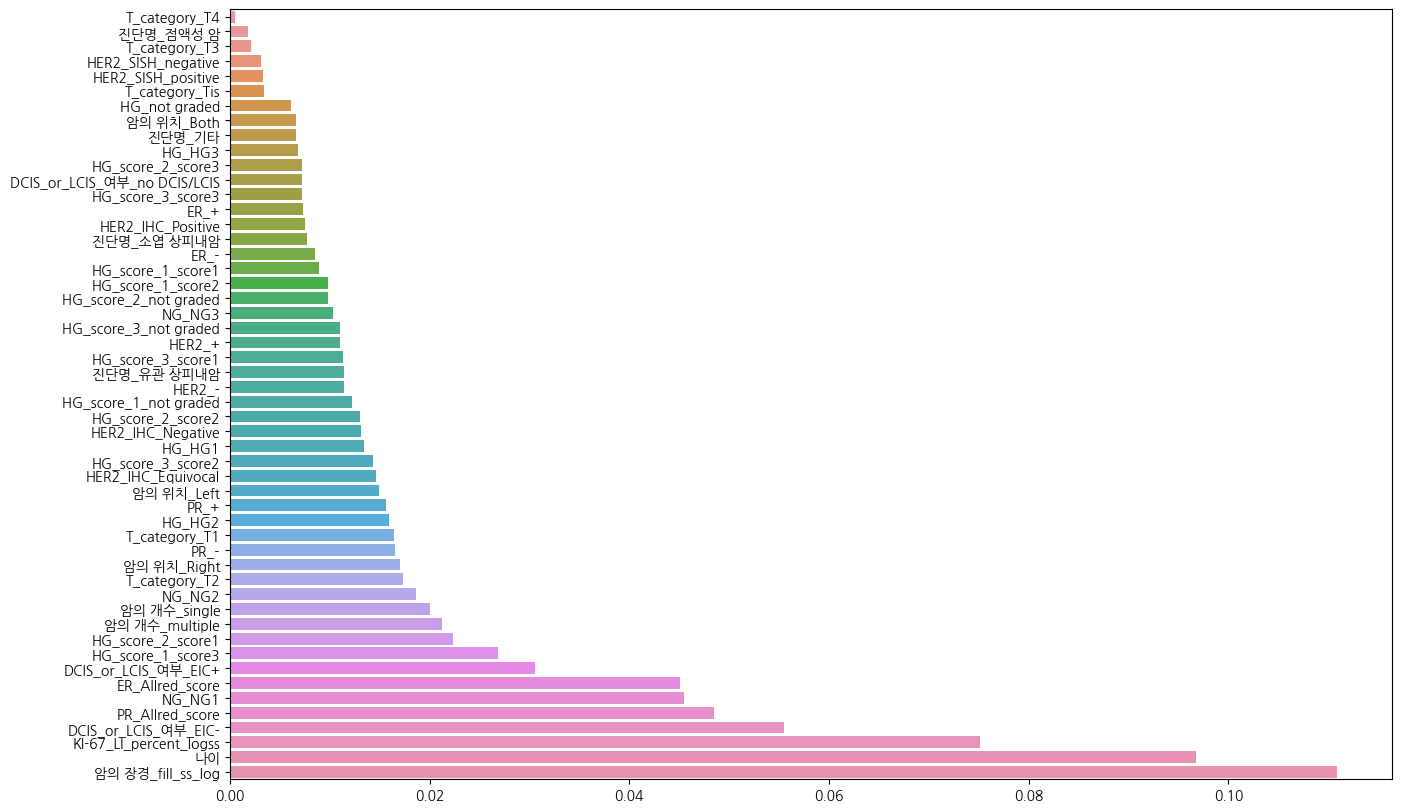

In [82]:
plt.figure(figsize = (15,10))
sns.barplot(x = fi , y = fi.index)

## 정확도 측정

In [83]:
from sklearn.model_selection import cross_val_predict
y_val_pred = cross_val_predict(best_model, X_train, y_train)

In [84]:
from sklearn.metrics import f1_score
f1_score(y_train, y_val_pred, average = 'macro')

0.721998887995552